<a href="https://colab.research.google.com/github/DmitriiDenisov/research_oversampling/blob/master/Research_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.
- One random point
- 2D plane

In [0]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [0]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [16]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 5.05706741 10.01893334]
 [ 7.32604402  5.67059065]]
[ 2.26897661 -4.34834269]


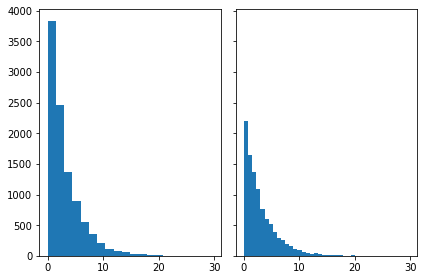

In [17]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [0]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [0]:
gamma_coeff = generate_gamma()

In [0]:
# Generates new point on line between two initial points
def generate_point_on_line(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [0]:
generated_point = generate_point_on_line(two_points[0], v, gamma_coeff)

In [0]:
# For visualazion:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[2.44032319, 0.59564511],
       [1.98386361, 0.06945239],
       [2.24890566, 0.3749848 ]])

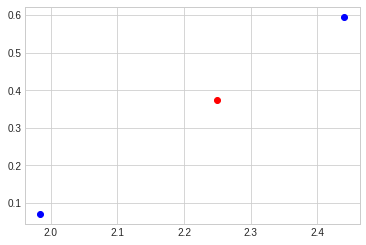

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [0]:
NUM_RAND_POINTS = 20

In [0]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 5.13542419 15.19691839]
 [ 2.51986217  0.264211  ]]
[ -2.61556202 -14.93270739]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

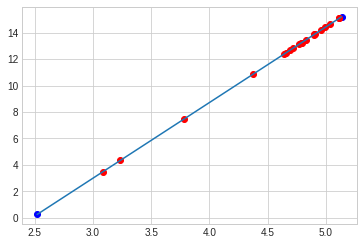

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [0]:
generated_points

array([[ 4.90286888, 13.86921887],
       [ 4.76968075, 13.10882425],
       [ 4.89953293, 13.85017336],
       [ 5.04051692, 14.65507593],
       [ 3.23427668,  4.3429301 ],
       [ 3.78140618,  7.46658945],
       [ 5.11650834, 15.08892443],
       [ 4.83211383, 13.46526578],
       [ 4.71706449, 12.80842869],
       [ 5.11589128, 15.08540152],
       [ 4.78573058, 13.20045557],
       [ 4.79193068, 13.23585301],
       [ 4.90598335, 13.88699996],
       [ 4.37868231, 10.87654478],
       [ 4.99756074, 14.40983152],
       [ 4.96098464, 14.20101204],
       [ 4.64368769, 12.38950753],
       [ 3.08562105,  3.49422873],
       [ 4.65981849, 12.48160111],
       [ 4.69312313, 12.67174322]])

In [0]:
two_points

array([[ 5.13542419, 15.19691839],
       [ 2.51986217,  0.264211  ]])

## 3.
- One Random point
- n dimentional space

In [0]:
# Generates n random points in hypercube [xy_min; xy_max]
def generate_random_point_nd(num_points=2, n=10, min_=0, max_=10):
    xy_min = [min_] * n
    xy_max = [max_] * n
    data = np.random.uniform(low=xy_min, high=xy_max, size=(num_points, n))
    return data

In [0]:
two_points_nd = generate_random_point_nd(num_points=2, n=10)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == 10
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[9.09819764e+00 9.64418124e+00 7.19466753e+00 1.29876817e-03
  4.92892747e+00 6.32496656e+00 7.78408714e+00 1.08271223e+00
  6.43781494e+00 4.35076706e+00]
 [6.69216173e+00 6.44691734e+00 5.51830777e+00 1.96677883e+00
  9.16120643e+00 6.73126588e+00 4.20021927e+00 3.23780719e-02
  9.41622285e+00 2.57135114e+00]]
[-2.40603591 -3.1972639  -1.67635975  1.96548006  4.23227896  0.40629932
 -3.58386786 -1.05033416  2.9784079  -1.77941592]


In [0]:
gamma_coeff = generate_gamma()

In [0]:
generated_point = generate_point_on_line(two_points_nd[0], v, gamma_coeff)
generated_point

array([9.06684456, 9.60251767, 7.17282287, 0.02691096, 4.98407834,
       6.33026105, 7.73738572, 1.06902532, 6.47662661, 4.32757947])

In [0]:
def test_points_on_line(p1, p2, list_p3, tol=10):
    # Calculate two vectors and check if they are collinear
    if len(list_p3.shape) == 1:
        list_p3 = list_p3[np.newaxis, :]
    vec_1 = p2 - p1
    for p3 in list_p3:
        vec_2 = (p3 - p1) / vec_1
        # take unique values
        unique_arr = np.unique(vec_2[~np.isnan(vec_2)].round(decimals=tol))
        if len(unique_arr) > 1:
          return False
        # Check that if nan then there were two zeros
        idx = np.where(~np.isfinite(vec_2))[0]
        if idx.size:
          if not (all((p3 - p1)[idx] == vec_1[idx]) and all(vec_1[idx] == 0)):
            return False
        return True
    return True

In [0]:
# Testing
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_point)

## 4.
- Multiple Random points
- n dimentional space

In [0]:
NUM_RAND_POINTS = 20
N_FEATURES = 10

In [0]:
two_points_nd = generate_random_point_nd(num_points=2, n=N_FEATURES)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == N_FEATURES
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[0.33259794 0.7642124  3.13487304 7.62967615 0.48635717 7.26986169
  9.43694268 3.84999841 4.95186852 2.34075288]
 [6.9263306  0.97355668 6.28163616 2.0649958  8.39245187 0.18687227
  8.00078819 5.08530577 5.94871337 5.34200805]]
[ 6.59373266  0.20934428  3.14676312 -5.56468036  7.9060947  -7.08298942
 -1.43615449  1.23530737  0.99684485  3.00125518]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)
    
assert generated_points.shape[0] == NUM_RAND_POINTS
assert generated_points.shape[1] == N_FEATURES

In [0]:
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_points)

## 5.
- Generalization of the approach for n minority points for n dimentional space

In [0]:
NUM_RAND_POINTS = 20
NUM_MINORITY_POINTS = 5
N_FEATURES = 10
NUM_TO_ADD = 15

In [0]:
minority_points_nd = generate_random_point_nd(num_points=NUM_MINORITY_POINTS, n=N_FEATURES)
assert minority_points_nd.shape[0] == NUM_MINORITY_POINTS
assert minority_points_nd.shape[1] == N_FEATURES
# print(two_points_nd)
# get vector for these two points
# v = get_vector_two_points(N_points_nd)
# print(v)

In [0]:
def generate_points_for_n_minority(minority_points, num_to_add):
  n_features = minority_points.shape[1]
  dict_ans = defaultdict(lambda: np.array([]).reshape(0, n_features))
  # Choose random pairs with repetition:
  all_comb = np.array(list(itertools.combinations(range(len(minority_points)), r=2)))
  rand_idx = np.random.choice(range(len(all_comb)), num_to_add, replace=True)
  assert rand_idx.shape == (num_to_add, )
  # print(rand_idx)
  # print(all_comb)
  all_comb = all_comb[rand_idx]
  # assert random_choice_minority.shape[0] == num_to_add and random_choice_minority.shape[1] == 2
  for i, (idx1, idx2) in enumerate(all_comb):
    v = get_vector_two_points([minority_points[idx1], minority_points[idx2]])
    gamma_coeff = generate_gamma()
    generated_point = generate_point_on_line(minority_points[idx1], v, gamma_coeff)
    minority_points = np.concatenate((minority_points, generated_point[np.newaxis, :]), axis=0)
    dict_ans[tuple(all_comb[i])] = np.vstack([dict_ans[tuple(all_comb[i])], generated_point])
    
  return minority_points, dict_ans # return concatenated initial+generated points and dict for testing


In [10]:
minority_points, dict_ans = generate_points_for_n_minority(minority_points_nd, num_to_add=NUM_TO_ADD)

NameError: ignored

In [0]:
minority_points_nd

array([[3.47928404, 8.45604222, 4.82371047, 9.47912243, 5.32479813,
        5.95008213, 3.73862921, 1.64254422, 7.69936937, 0.27401471],
       [5.52415041, 6.40766849, 1.31677918, 3.75455514, 4.02021072,
        0.97278   , 9.61482844, 6.1083918 , 9.52666096, 0.34876489],
       [9.66250977, 4.10062803, 7.38954771, 3.27046553, 8.0356289 ,
        2.14221836, 7.55097115, 6.71250609, 1.29132979, 1.49957061],
       [4.22162966, 3.57159931, 0.12697156, 4.54840936, 4.76007389,
        6.28517819, 3.32559141, 8.4110134 , 8.13545121, 4.88097721],
       [8.96084466, 1.0610845 , 4.67585434, 8.91645008, 4.97994401,
        1.14186761, 6.22694555, 5.91420679, 4.36410625, 0.90907455]])

In [0]:
minority_points

array([[3.47928404, 8.45604222, 4.82371047, 9.47912243, 5.32479813,
        5.95008213, 3.73862921, 1.64254422, 7.69936937, 0.27401471],
       [5.52415041, 6.40766849, 1.31677918, 3.75455514, 4.02021072,
        0.97278   , 9.61482844, 6.1083918 , 9.52666096, 0.34876489],
       [9.66250977, 4.10062803, 7.38954771, 3.27046553, 8.0356289 ,
        2.14221836, 7.55097115, 6.71250609, 1.29132979, 1.49957061],
       [4.22162966, 3.57159931, 0.12697156, 4.54840936, 4.76007389,
        6.28517819, 3.32559141, 8.4110134 , 8.13545121, 4.88097721],
       [8.96084466, 1.0610845 , 4.67585434, 8.91645008, 4.97994401,
        1.14186761, 6.22694555, 5.91420679, 4.36410625, 0.90907455],
       [3.48639652, 8.40924397, 4.77871064, 9.43188087, 5.31938746,
        5.95329271, 3.73467186, 1.70739346, 7.70354751, 0.31815439],
       [4.28988471, 3.53544241, 0.19248541, 4.61131869, 4.7632405 ,
        6.21110328, 3.36737725, 8.37505393, 8.0811356 , 4.82377313],
       [3.53171994, 8.11102752, 4.4919543

In [0]:
# testing:
n_points = 0
for key, points in dict_ans.items():
  for point in points:
    n_points+=1
    assert test_points_on_line(minority_points_nd[key[1]], minority_points_nd[key[0]], point)
assert n_points == NUM_TO_ADD

## 6.
- Gamma distribution with negative values

In [0]:
NUM_POINTS = 50

In [0]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[5.20628019 4.65884325]
 [1.41357663 1.74192442]]
[-3.79270356 -2.91691882]


In [0]:
def max_pdf_gamma(k, theta):
  return (k-1) * theta

def generate_gamma_negative():
    k, theta = 3, 2.1
    s = np.random.gamma(k, theta, 1)[0]
    s = s - max_pdf_gamma(k, theta) # shift by X axis
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [0]:
gamma_coeff = generate_gamma_negative()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_POINTS - 1):
    gamma_coeff = generate_gamma_negative()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

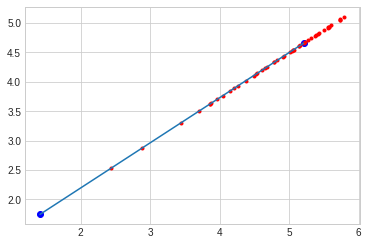

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, '.', color='red');
plt.plot(initial_x, initial_y, '-');

## 7. Apply to real datasets

In [1]:
!pip install imbalanced-learn==0.5

     |████████████████████████████████| 174kB 2.7MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [2]:
import imblearn
imblearn.__version__

Using TensorFlow backend.


'0.5.0'

In [0]:
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import pandas as pd

In [0]:
def get_dataset_pd(name):
  X = pd.DataFrame(fetch_datasets()[name]['data'])
  target = pd.DataFrame(fetch_datasets()[name]['target']).replace(-1, 0)
  assert target.shape[0] == X.shape[0]
  return X, target

In [0]:
def aug_train(X):
  # Подавать внутрь датафрейм X с колонкой y
  num_zeros = X[X['y'] == 0].to_numpy().shape[0]
  num_ones = X[X['y'] == 1].to_numpy().shape[0]

  num_add = num_zeros - num_ones
  minority_points = X[X['y'] == 1].to_numpy()

  minority_points, dict_ans = generate_points_for_n_minority(minority_points, num_add)
  assert minority_points.shape[0] == X[X['y'] == 1].to_numpy().shape[0] + num_add 
  assert num_zeros == minority_points.shape[0]

  # testing:
  initial_rows = X[X['y'] == 1].to_numpy().shape[0]
  n_points = 0
  for key, points in dict_ans.items():
    for point in points:
      n_points+=1
      assert key[1] <= initial_rows and key[0] <= initial_rows
      assert test_points_on_line(minority_points[key[1]], minority_points[key[0]], point)
  assert n_points == num_add
  assert np.all(np.equal(minority_points[:initial_rows], X[X['y'] == 1].to_numpy()))

  X_aug = np.concatenate((X[X['y'] == 0].to_numpy(), minority_points), axis=0)
  y_aug = np.array([0] * num_zeros + [1] * num_zeros)
  assert X_aug.shape[0] == 2 * num_zeros
  assert y_aug.shape[0] == X_aug.shape[0]

  df_new = pd.DataFrame(X_aug)
  df_new['y'] = y_aug

  return df_new

In [44]:
X, y = get_dataset_pd('abalone')
X['y'] = y

# 1. Split on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random_state=42

# 2. Augment train part by generating new minority points
X_train_aug = aug_train(X_train)

# 3. Shuffle
X_train_aug = X_train_aug.sample(frac=1) # shuffle

# 4. Drop target from train
y_train_aug = X_train_aug['y']
X_train_aug = X_train_aug.drop('y', 1)

# 5. Fit:


# 6. Predict:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,1.000000,0.625000,0.500000,0.180000,1.370500,0.645000,0.303000,0.370500,0.0
1,0.000000,1.000000,0.000000,0.545000,0.425000,0.140000,0.814500,0.305000,0.231000,0.244000,0.0
2,0.000000,1.000000,0.000000,0.235000,0.130000,0.075000,0.158500,0.068500,0.037000,0.046500,0.0
3,0.000000,1.000000,0.000000,0.280000,0.210000,0.065000,0.111000,0.042500,0.028500,0.030000,0.0
4,0.000000,0.000000,1.000000,0.650000,0.525000,0.185000,1.345500,0.586000,0.278000,0.386500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6039,0.000000,1.000000,0.000000,0.453737,0.348863,0.134116,0.529792,0.280725,0.084881,0.131451,1.0
6040,0.000000,0.744876,0.255124,0.418064,0.318064,0.106378,0.337306,0.156485,0.065252,0.100936,1.0
6041,0.000000,0.015998,0.984002,0.522040,0.412360,0.133960,0.785349,0.389361,0.186656,0.199648,1.0
6042,0.902966,0.097034,0.000000,0.325000,0.259030,0.089030,0.189753,0.084175,0.035854,0.060739,1.0


In [36]:

df_new

,0,1,2,3,4,5,6,7,8,9,10,y
0,0.000000,0.00000,1.000000,0.455000,0.365000,0.095000,0.514000,0.224500,0.101000,0.150000,0.0,0
1,1.000000,0.00000,0.000000,0.530000,0.420000,0.135000,0.677000,0.256500,0.141500,0.210000,0.0,0
2,0.000000,0.00000,1.000000,0.440000,0.365000,0.125000,0.516000,0.215500,0.114000,0.155000,0.0,0
3,0.000000,1.00000,0.000000,0.425000,0.300000,0.095000,0.351500,0.141000,0.077500,0.120000,0.0,0
4,1.000000,0.00000,0.000000,0.530000,0.415000,0.150000,0.777500,0.237000,0.141500,0.330000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7567,0.838720,0.16128,0.000000,0.510646,0.380485,0.137742,0.692666,0.274454,0.152307,0.227582,1.0,1
7568,0.101071,0.00000,0.898929,0.352687,0.276118,0.105505,0.258234,0.113007,0.062266,0.082378,1.0,1
7569,0.000000,1.00000,0.000000,0.399563,0.310000,0.099563,0.143253,0.108185,0.071087,0.085699,1.0,1
7570,0.000000,1.00000,0.000000,0.437378,0.332752,0.106042,0.368528,0.173966,0.073831,0.095539,1.0,1


In [38]:
X.shape

(4177, 11)